In [5]:
! pip install prophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 19.9 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
#Imports
import pandas as pd
from prophet import Prophet
from matplotlib import pyplot
from sklearn.metrics import mean_absolute_error


In [5]:
def prophet_prediccion(data_train,data_test):
    
    data_train.reset_index()
    data_train.rename(columns={'index' : 'ds', data_train.columns[0]: 'y'}, inplace=True)
    
    model = Prophet()
    model.fit(data_train)
    
    future = model.make_future_dataframe(periods=len(data_test),freq='M')
    forecast=model.predict(future)
    
    y_true=data_test.values
    y_pred=forecast['yhat'].values
    
    mae = mean_absolute_error(y_true,y_pred)
    print('MAE: %.3f' % mae)

    # plot expected vs actual
    pyplot.plot(y_true, label='Actual')
    pyplot.plot(y_pred, label='Predicted')
    pyplot.legend()
    pyplot.show()

           ds      y
91 1967-08-01  13434
92 1967-09-01  13598
93 1967-10-01  17187
94 1967-11-01  16119
95 1967-12-01  13713


10:52:33 - cmdstanpy - INFO - Chain [1] start processing
10:52:34 - cmdstanpy - INFO - Chain [1] done processing


MAE: 1336.813


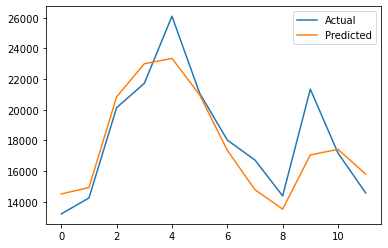

In [7]:
# evaluate prophet time series forecasting model on hold out dataset
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = read_csv(path, header=0)
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= to_datetime(df['ds'])
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
print(train.tail())
# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

,Valor
2000-01-31,50.377254
2000-02-29,50.516819
2000-03-31,50.793820
2000-04-30,50.982500
2000-05-31,51.026608
...,...
2029-08-31,121.223765
2029-09-30,121.561389
2029-10-31,121.645259
2029-11-30,121.880477


In [ ]:
# import the regression module
from pycaret.regression import *

# initialize setup
s = setup(data = train, test_data = test, target = 'Passengers', fold_strategy = 'timeseries', numeric_features = ['Year', 'Series'], fold = 3, transform_target = True, session_id = 123)